###For this analysis, we have marketing campaign data for customers who responded to our promotional out reach. Our role is to build a model that will help us predict future responses and non responses. We hence will try a number of machine learning classifiers and choose the one that gives us the best performance.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
marketing=pd.read_csv('/content/drive/MyDrive/ML Learning csv/marketing_campaign.csv')

In [95]:
df=marketing
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [96]:
df.shape# take a rough look over the dataset

(2240, 29)

In [97]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [98]:
df.isnull().sum()#check missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [99]:
df['Income'] = df['Income'].fillna(df.Income.mean(), axis = 0)#fill the na value with the mean of income ,since we can not drop the na simply or fill it simply with 0 in this case
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [100]:
df.duplicated().sum()#check duplicated

0

In [101]:
df.info()#check the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [102]:
#Convert the date column to date type column, and divide into three columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop('Dt_Customer', axis=1)

In [103]:
le=LabelEncoder()#encode the education column
label=le.fit_transform(df['Education'])
label
df.drop('Education',axis=1)
df['Education']=label

In [104]:
label1=le.fit_transform(df['Marital_Status'])#encode the marital_Status column
df.drop('Marital_Status',axis=1)
df['Marital_Status']=label1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [105]:
#filtering the features with only one class or single value and drop
for col in df.columns :
    if len(df[col].value_counts()) == 1 :
        print(df[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


####Selecting best features

In [106]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [107]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
bestfeatures = SelectKBest(score_func=chi2, k=24)

In [108]:
# Create feature and target variable for Classification problem
#From here we shall select the best variables and drop the worst
X_class=df.iloc[:,0:29]
X_class= df.drop('Response', axis=1)

In [109]:
X_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [110]:
y_class = df['Response']

In [111]:
fit=bestfeatures.fit(X_class,y_class)

In [112]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_class.columns)

In [113]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [114]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score'))  #print 24 best features

                  Specs          Score
4                Income  473472.009532
8              MntWines   51024.911306
10      MntMeatProducts   38163.348656
13         MntGoldProds    2707.137916
11      MntFishProducts    2207.013648
9             MntFruits    2113.840506
0                    ID    2036.678868
12     MntSweetProducts    1942.214339
7               Recency    1505.927704
16  NumCatalogPurchases     350.399895
21         AcceptedCmp5     221.594577
22         AcceptedCmp1     181.147090
19         AcceptedCmp3     134.272389
15      NumWebPurchases      93.618892
20         AcceptedCmp4      64.958669
23         AcceptedCmp2      63.338611
6              Teenhome      31.282167
2             Education       9.760720
5               Kidhome       9.352991
17    NumStorePurchases       6.332440
28       Month_Customer       4.493978
29         Day_Customer       0.843371
3        Marital_Status       0.090419
1            Year_Birth       0.074276


In [115]:
#Best features- ID,Year_Birth ,Education ,Marital_Status ,Income,Kidhome,Teenhome,Recency,MntWines ,MntFruits ,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3 ,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,	Month_Customer,	Day_Customer

In [116]:
#Worst features to drop  
#NumDealsPurchases    
#NumWebVisitsMonth     
#Complain              
#Z_CostContact        
#Z_Revenue   
#Year_Customer

In [118]:
#Specify the dependent variable and independent variable
y=df['Response']
x=df.drop(['Response','NumWebVisitsMonth','Z_Revenue','Year_Customer','Z_CostContact','NumDealsPurchases','Complain'],axis=1)
x

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,8,10,4,0,0,0,0,0,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,1,1,2,0,0,0,0,0,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,8,2,10,0,0,0,0,0,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,0,4,0,0,0,0,0,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,3,6,0,0,0,0,0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,182,42,118,247,9,3,4,0,0,0,0,0,6,13
2236,4001,1946,4,5,64014.0,2,1,56,406,0,30,0,0,8,8,2,5,0,0,0,1,0,6,10
2237,7270,1981,2,2,56981.0,0,0,91,908,48,217,32,12,24,2,3,13,0,1,0,0,0,1,25
2238,8235,1956,3,5,69245.0,0,1,8,428,30,214,80,30,61,6,5,10,0,0,0,0,0,1,24


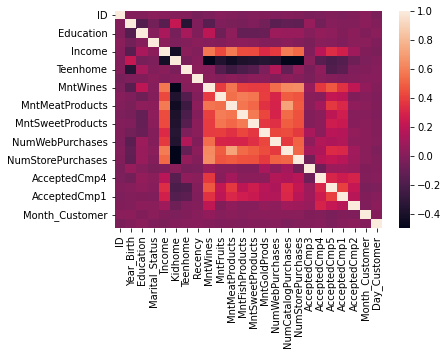

In [119]:
corr_matrix=x.corr()#check correlation
sns.heatmap(corr_matrix)
#corr_matrix

###Model building

In [120]:
#import logistic model
x1=sm.add_constant(x)
logr_model=sm.Logit(y,x)
logr_fit=logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.293948
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2216
Method:                           MLE   Df Model:                           23
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                  0.3020
Time:                        20:18:38   Log-Likelihood:                -658.44
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                9.200e-106
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ID                  -1.616e-05   2.24e-05     -0.720      0.471   -6.01e-05    2.78e-05
Ye

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group

Scaling is applied to independent variables to normalize the data within a particular range. It also helps in speeding up the calculations in an algorithm.

In [122]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.fit_transform(x_test)

###LOGISTIC MODEL

In [123]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(rescaledX_train,y_train)
print(loggreg_final.score(rescaledX_train,y_train))

0.8844866071428571


In [124]:
y_pred=logreg.predict(rescaledX_test)

#Confusion matrix for the logistic model prediction
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[369  16]
 [ 41  22]]


In [125]:
#Classification report for logistic model prediction
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       385
           1       0.58      0.35      0.44        63

    accuracy                           0.87       448
   macro avg       0.74      0.65      0.68       448
weighted avg       0.85      0.87      0.86       448



Logistic model Hyperparameter tuning

In [126]:
# Import GridSearchCV Logistic
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 and 0.0001]
C = np.logspace(-4, 4, 20)
max_iter= [100, 1000,2500, 5000]

param_grid = dict(tol= tol, max_iter= max_iter,C=C)

In [127]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(x)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.882143 using {'C': 0.615848211066026, 'max_iter': 100, 'tol': 0.01}


###SVM Model

In [128]:
#SVM model
svc_model=svm.SVC(kernel='linear')
svc_final=svc_model.fit(rescaledX_train,y_train)
print(svc_final.score(rescaledX_train,y_train))

0.8727678571428571


In [129]:
y_pred1=svc_model.predict(rescaledX_test)
print(classification_report(y_test,y_pred1))#classification report for svm model prediction

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       385
           1       0.58      0.17      0.27        63

    accuracy                           0.87       448
   macro avg       0.73      0.58      0.60       448
weighted avg       0.84      0.87      0.83       448



In [130]:
cm2=confusion_matrix(y_test, y_pred1)#confusion matrix for the svm model prediction
print(cm2)

[[377   8]
 [ 52  11]]


In [131]:
print(svc_model.coef_)# obtain features weight to see which factor is more important

[[-1.48712070e-02  2.02939744e-01  2.85575370e-01 -8.44784567e-02
  -5.69430570e-01 -1.10136518e-03 -2.64451059e-01 -7.84406547e-01
  -2.98134675e-02  2.88691952e-01  6.59200867e-01 -2.18004985e-01
  -8.26967070e-02  3.91188469e-01  6.38554260e-01  3.45350287e-01
  -6.65340069e-01  4.01273257e-01  3.80939376e-01  1.11070864e+00
   5.90205342e-01  9.94447558e-01  5.78363235e-02 -1.74675798e-02]]


SVM Hyperparameter tuning

In [132]:
# Import GridSearchCV Logistic
from sklearn.model_selection import GridSearchCV

# Define the grid of values
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

param_grid = dict(C=C,gamma=gamma)

In [133]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(x)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.871875 using {'C': 1000, 'gamma': 1}


###XGB Model

In [134]:
#XGB model
from xgboost import XGBClassifier
clf2 = XGBClassifier()
clf2_final=clf2.fit(rescaledX_train,y_train)
print(clf2_final.score(rescaledX_train,y_train))

0.9308035714285714


In [135]:
y_pred1=clf2.predict(rescaledX_test)
print(classification_report(y_test,y_pred1))#classification report for xgb prediction

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       385
           1       0.52      0.35      0.42        63

    accuracy                           0.86       448
   macro avg       0.71      0.65      0.67       448
weighted avg       0.85      0.86      0.85       448



In [136]:
cm3=confusion_matrix(y_test, y_pred1)#confusion matrix for the xgb prediction
print(cm3)

[[365  20]
 [ 41  22]]


XGB Model Hyper parameter tuning

In [137]:
# Import GridSearchCV XGBoost
from sklearn.model_selection import GridSearchCV

# Define the grid of values
max_depth = [4,5,6,8]
n_estimators = [60,220,500,750]
learning_rate = [0.1, 0.01, 0.05]
min_child_weight =[6,8,10]

param_grid = dict(max_depth=max_depth,n_estimators=n_estimators,learning_rate=learning_rate,min_child_weight=min_child_weight)

In [138]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(x)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.880357 using {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 60}


###Performance results

###Logistic model


*   Logistic model before tuning-0.88448
*   Logistic model after tuning-0.88214

###SVM model

*   SVM model before tuning-0.87276
*   SVM model after tuning-0.871875

###XBG model

*   XGB model before tuning-0.93080
*   XGB model after tuning-0.88035
